# 1.All the Libraries required 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
import warnings
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
import csv
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neural_network import MLPClassifier
import warnings
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

warnings.filterwarnings('ignore')



# 2. Outlier Detector Function

In [2]:
outliers=[]
def detect_outliers(data):
    
    threshold=3
    mean = np.mean(data)
    std =np.std(data)
    
    
    for i in data:
        z_score= (i - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

# 3.Outlier Remover Function

In [3]:
def Remove_Outliers(data):


    outer = detect_outliers(data)
    if(outer):
        outer = set(outer)
        # data = data.loc[:, data!=data.loc[data.isin(outer)]]
        # print()
        data.loc[data.isin(outer)] = data.mean()
        # print(outer,"\n'''''''''\n")
        # dam = list(dam)
        # print(dam)
        # data = data[dat_gam]

        # print(outer)
        # print(data[94:99])
        # exit()
        # del data[loc]

    # print(data.head())
    return data

In [43]:
def uniquify_me(*lister):
    auxiliaryList = []

    for word in lister:

        if word not in auxiliaryList:
            
            auxiliaryList.append(word)

    return auxiliaryList

# 4.Data Preprocessing

Feature Engineering and Everything.

Also, stores the processed data

In [45]:
dataset = pd.read_csv("train.csv")
TestDataset = pd.read_csv("test.csv")

def DataPreProcessing():                    
	
    global dataset
    global TestDataset
    fillNa_value = np.float(0.0)
    
    # TestDataset = TestDataset.loc[:, TestDataset.columns != 'PassengerId']
#     TestDataset = TestDataset.loc[:, TestDataset.columns != 'Cabin']
#     TestDataset = TestDataset.loc[:, TestDataset.columns != 'Embarked']
#     TestDataset = TestDataset.loc[:, TestDataset.columns != 'Ticket']
#     TestDataset = TestDataset.loc[:, TestDataset.columns != 'Pclass']
    # TestDataset = TestDataset.loc[:, TestDataset.columns != 'Fare']

    # ########   ##############  >>>>>>>>>>  Filling Na by Mean <<<<<<<<<<<<<<<
    
    TestDataset['Embarked'].fillna('S',inplace=True)
    TestDataset['Pclass'].fillna(3,inplace=True)
    TestDataset['Fare'].fillna(TestDataset['Fare'].mean(),inplace=True)

    dataset['Embarked'].fillna('S',inplace=True)
    dataset['Pclass'].fillna(3,inplace=True)
    dataset['Fare'].fillna(dataset['Fare'].mean(),inplace=True)

    TestDataset.fillna(fillNa_value,inplace=True)
    dataset.fillna(fillNa_value,inplace=True)
 
    #############################################################################



    # for abc in TestDataset["Age"]:
    # print(type(fillNa_value))
    # for x in TestDataset["Age"]:
    # 	print(type(x))
    # 	exit()
    # kill = 
    ##############################  Family as feature #######################
    
    TestDataset['Family'] = TestDataset['SibSp'] + TestDataset['Parch'] + 1
    dataset['Family'] = dataset['SibSp'] + dataset['Parch'] + 1

    ##################################### Dealing with Tickets #########################################
#     '''
    index = 0

    num = 1
    a = 0
    tiketo = pd.DataFrame(columns = TestDataset["Ticket"])

    while(a < len(TestDataset["Ticket"])):
    	b = a+1
    	while(b < len(TestDataset["Ticket"])-1):
    		if(TestDataset["Ticket"][a] == TestDataset["Ticket"][b]):
    			TestDataset["Ticket"][b] = num
    		b+=1
    	a+=1
    	num+=1

    index = 0

    for a in TestDataset["Ticket"]:
    	if(type(a) == type("asdkjb")):
    		TestDataset["Ticket"][index] = num
    		num += 1
    	index += 1


    index = 0

    num = 1
    a = 0
    tiketo = pd.DataFrame(columns = dataset["Ticket"])

    while(a < len(dataset["Ticket"])):
    	b = a+1
    	while(b < len(dataset["Ticket"])-1):
    		if(dataset["Ticket"][a] == dataset["Ticket"][b]):
    			dataset["Ticket"][b] = num
    		b+=1
    	a+=1
    	num+=1

    index = 0

    for a in dataset["Ticket"]:
    	if(type(a) == type("asdkjb")):
    		dataset["Ticket"][index] = num
    		num += 1
    	index += 1


    # ................................................................................................
    a = 0

    while(a < len(dataset["Ticket"])):
    	b = a+1
    	while(b < len(dataset["Ticket"])-1):
    		if(dataset["Ticket"][a] == dataset["Ticket"][b]):
    			dataset["Ticket"][b] = num
    		b+=1
    	a+=1
    	num+=1

    index = 0

    for a in dataset["Ticket"]:
    	if(type(a) == type("asdkjb")):
    		dataset["Ticket"][index] = num
    		num += 1
    	index += 1
        # '''

        ############################# Adressing Missing Ages ########################################
    
    
    index = 0
    for age,sex,name,spo in zip(TestDataset["Age"],TestDataset["Sex"],TestDataset["Name"],TestDataset["SibSp"]) :
        if( sex == 'female'):
            if "Mrs." in name:
                if age == fillNa_value:
                    TestDataset["Age"][index] = 33.5

            elif "Miss" in name:
                if age == fillNa_value:
                    TestDataset["Age"][index]  = 17.8

        else:
            if "Mr." in name:
                if age == fillNa_value:
                    TestDataset["Age"][index]  = 23.3
                    
        index += 1


    index = 0
    for age,sex,name,spo in zip(dataset["Age"],dataset["Sex"],dataset["Name"],dataset["SibSp"]) :
        if( sex == 'female'):
            if "Mrs." in name:
                if age == fillNa_value:
                    dataset["Age"][index] = 33.5
            elif "Miss" in name:

                if age == fillNa_value:
                    dataset["Age"][index]  = 17.8

        else:
            if "Mr." in name:
                
                if age == fillNa_value:
                    dataset["Age"][index]  = 23.3


    for xyz,sex in zip(TestDataset["Name"],TestDataset["Sex"]):
        if "Mr." in xyz:
            TestDataset.replace(xyz,1,inplace = True)
        elif("Mrs." in xyz):
            TestDataset.replace(xyz,2,inplace = True)
        elif("Miss." in xyz):
            TestDataset.replace(xyz,3,inplace = True)	
        elif("Don." in xyz):
            TestDataset.replace(xyz,4,inplace = True)	
        elif("Dr." in xyz):
            if sex == "male" :
                TestDataset.replace(xyz,5,inplace = True)
            else:
                TestDataset.replace(xyz,6,inplace = True)
        elif("Ms." in xyz):
            TestDataset.replace(xyz,7,inplace = True)
        elif("Lady." in xyz):
            TestDataset.replace(xyz,8,inplace = True)
        elif("Capt." in xyz):
            TestDataset.replace(xyz,9,inplace = True)
        elif("Master." in xyz):
            TestDataset.replace(xyz,10,inplace = True)
        elif("Dona." in xyz):
            TestDataset.replace(xyz,11,inplace = True)
        elif("Col." in xyz):
            TestDataset.replace(xyz,12,inplace = True)		
        elif("Rev." in xyz):
            TestDataset.replace(xyz,13,inplace = True)
        elif("Mme." in xyz):
            TestDataset.replace(xyz,14,inplace = True)
        elif("Major." in xyz):
            TestDataset.replace(xyz,15,inplace = True)
        elif("Sir." in xyz):
            TestDataset.replace(xyz,16,inplace = True)
        elif("Mlle." in xyz):
            TestDataset.replace(xyz,17,inplace = True)
        elif("Countess." in xyz):
            TestDataset.replace(xyz,18,inplace = True)
        elif("Jonkheer." in xyz):
            TestDataset.replace(xyz,19,inplace = True)				
        else:
            TestDataset.replace(xyz,0,inplace = True)


    TestDataset.replace('male',1,inplace=True)
    TestDataset.replace('female',2,inplace=True)
    TestDataset.replace('Q',1,inplace=True)
    TestDataset.replace('S',2,inplace=True)
    TestDataset.replace('C',3,inplace=True)


    dataset.fillna(fillNa_value,inplace=True)
    dataset = dataset.loc[:, dataset.columns != 'PassengerId']
#     dataset = dataset.loc[:, dataset.columns != 'Cabin']
#     dataset = dataset.loc[:, dataset.columns != 'Embarked']
#     dataset = dataset.loc[:, dataset.columns != 'Ticket']
#     dataset = dataset.loc[:, dataset.columns != 'Pclass']
    # dataset = dataset.loc[:, dataset.columns != 'Fare']



#     '''
    # Dealing with Cabin column
    lister = []	
    # TestDataset["Cabin"].fillna(0,inplace = True)
    for x in TestDataset["Cabin"] :
    	if x == fillNa_value:
    		pass
    	else:
    		lister.append(x)

    for x in dataset["Cabin"] :
    	if x == fillNa_value:
    		pass
    	else:
    		lister.append(x)

    lister = uniquify_me(*lister)
    number = 1
    for cabin in lister:
    	TestDataset.replace(cabin,number,inplace  = True)
    	dataset.replace(cabin,number,inplace  = True)
    	number += 1
#     '''

    for xyz,sex in zip(dataset["Name"],dataset["Sex"]):

        if("Mr." in xyz):
            dataset.replace(xyz,1,inplace = True)
        elif("Mrs." in xyz):
            dataset.replace(xyz,2,inplace = True)
        elif("Miss." in xyz):
            dataset.replace(xyz,3,inplace = True)	
        elif("Don." in xyz):
            dataset.replace(xyz,4,inplace = True)	
        elif("Dr." in xyz):
            if sex == "male" :
                dataset.replace(xyz,5,inplace = True)
            else:
                dataset.replace(xyz,6,inplace = True)
        elif("Ms." in xyz):
            dataset.replace(xyz,7,inplace = True)
        elif("Lady." in xyz):
            dataset.replace(xyz,8,inplace = True)
        elif("Capt." in xyz):
            dataset.replace(xyz,9,inplace = True)
        elif("Master." in xyz):
            dataset.replace(xyz,10,inplace = True)
        elif("Dona." in xyz):
            dataset.replace(xyz,11,inplace = True)
        elif("Col." in xyz):
            dataset.replace(xyz,12,inplace = True)		
        elif("Rev." in xyz):
            dataset.replace(xyz,13,inplace = True)	
        elif("Mme." in xyz):
            dataset.replace(xyz,14,inplace = True)
        elif("Major." in xyz):
            dataset.replace(xyz,15,inplace = True)
        elif("Sir." in xyz):
            dataset.replace(xyz,16,inplace = True)
        elif("Mlle." in xyz):
            dataset.replace(xyz,17,inplace = True)
        elif("Countess." in xyz):
            dataset.replace(xyz,18,inplace = True)
        elif("Jonkheer." in xyz):
            dataset.replace(xyz,19,inplace = True)			
        else:
            dataset.replace(xyz,0,inplace = True)


    dataset.replace('male',1,inplace=True)
    dataset.replace('female',2,inplace=True)
    dataset.replace('Q',1,inplace=True)
    dataset.replace('S',2,inplace=True)
    dataset.replace('C',3,inplace=True)

    dataset['Fare']	= dataset['Fare']/(dataset['SibSp']+dataset['Parch']+1)
    TestDataset['Fare']	= TestDataset['Fare']/(TestDataset['SibSp']+TestDataset['Parch']+1)
        
        
        # AGE Divided by 100
    # TestDataset["Age"] = TestDataset["Age"]
    # dataset["Age"] = dataset["Age"]

    # dataset = dataset.loc[:, dataset.columns != 'Parch']
    # TestDataset = TestDataset.loc[:, TestDataset.columns != 'Parch']
    # dataset = dataset.loc[:, dataset.columns != 'SibSp']
    # TestDataset = TestDataset.loc[:, TestDataset.columns != 'SibSp']

    ############################################## Saving all the processed data #################################################

    # print(TestDataset.describe())

    # TestDataset = TestDataset.loc[:, TestDataset.columns != 'Parch']
    # TestDataset = TestDataset.loc[:, TestDataset.columns != 'SibSp']
    # dataset = dataset.loc[:, dataset.columns != 'Parch']
    # dataset = dataset.loc[:, dataset.columns != 'SibSp']
    
#     for a in ['Age','SibSp','Parch','Fare']:
#         TestDataset[a] = Remove_Outliers(TestDataset[a])
#         dataset[a] = Remove_Outliers(dataset[a] )

    print('done---------------------------------------------')




    # exit()

    TestDataset.to_csv("file_name_Test.csv", sep=',')
    dataset.to_csv("file_name_train.csv", sep=',')

    dataset = pd.read_csv("file_name_train.csv")
    TestDataset = pd.read_csv("file_name_Test.csv")

    print("new file written")


    ##############################################################################################################################

    X = dataset.loc[:, dataset.columns != 'Survived']
    Y = dataset['Survived']	

    X_Test = TestDataset.loc[:, TestDataset.columns != 'Survived']

    scaler = MinMaxScaler()
    scaler.fit(X)
    X = scaler.transform(X)

    X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3,random_state = 12)

    # print(dataset.head())

    print("\n\npreprocessing done\n\n ")
    return X_train,X_test,y_train,y_test,X,Y,X_Test
DataPreProcessing()

done---------------------------------------------
new file written


preprocessing done

 


(array([[0.93483146, 1.        , 0.        , ..., 0.        , 1.        ,
         0.        ],
        [0.43932584, 1.        , 0.        , ..., 0.        , 0.5       ,
         0.        ],
        [0.55842697, 1.        , 0.        , ..., 0.        , 0.5       ,
         0.        ],
        ...,
        [0.43820225, 0.        , 0.        , ..., 0.67741935, 0.5       ,
         0.3       ],
        [0.7494382 , 1.        , 0.        , ..., 0.        , 0.5       ,
         0.        ],
        [0.94719101, 1.        , 0.        , ..., 0.        , 1.        ,
         0.        ]]),
 array([[0.51235955, 0.        , 0.        , ..., 0.70967742, 0.5       ,
         0.        ],
        [0.39438202, 0.        , 0.        , ..., 0.66129032, 0.5       ,
         0.        ],
        [0.19438202, 1.        , 0.        , ..., 0.        , 0.5       ,
         0.        ],
        ...,
        [0.72696629, 0.        , 0.61111111, ..., 0.84408602, 1.        ,
         0.        ],
        [0.9

# 5.Function to read the saved data

In [47]:
def Read_the_processed_data():

    dataset = pd.read_csv("file_name_train.csv")
    TestDataset = pd.read_csv("file_name_Test.csv")
    ''',index_col="Age"
    ,index_col="Age"'''
    del TestDataset['Unnamed: 0']
    del dataset['Unnamed: 0']
    X_Test = TestDataset.loc[:, TestDataset.columns != 'Survived']

    print("reading done")

    # print(dataset.head())

    X = dataset.loc[:, dataset.columns != 'Survived']
    Y = dataset['Survived']	
    '''
    print("shapes before and after transformation")
    print(X.shape)

    clf = RandomForestClassifier(
                                n_estimators = 300,
                                max_depth = 15, 
                                random_state = 15,
                                max_features = 4,
                                max_leaf_nodes = 60
                                )
    clf = clf.fit(X, Y)

    model = SelectFromModel(clf, prefit=True)
    X_new = model.transform(X)
    print(X_new)
    # X_new_TestDataset = model.transform(X_Test)
    exit()

    
    TestDataset = X_new_TestDataset
    X = X_new
    print(X.shape)
    '''

    
    X_train,X_test,y_train,y_test = train_test_split(
                                                        X,Y,
                                                        test_size = 0.3,
                                                        random_state = 12
                                                        )


    return X_train,X_test,y_train,y_test,X,Y,X_Test

Read_the_processed_data()

reading done


(     Pclass  Name  Sex   Age  SibSp  Parch  Ticket     Fare  Cabin  Embarked  \
 832       3     1    1   0.0      0      0    1534   7.2292    0.0         3   
 391       3     1    1  21.0      0      0    1227   7.7958    0.0         2   
 497       3     1    1   0.0      0      0    1309  15.1000    0.0         2   
 398       2     5    1  23.0      0      0    1232  10.5000    0.0         2   
 70        2     1    1  32.0      0      0     961  10.5000    0.0         2   
 ..      ...   ...  ...   ...    ...    ...     ...      ...    ...       ...   
 241       3     3    2   0.0      1      0    1107   7.7500    0.0         1   
 253       3     1    1  30.0      1      0    1118   8.0500    0.0         2   
 390       1     1    1  36.0      1      2    1226  30.0000  126.0         2   
 667       3     1    1   0.0      0      0    1427   7.7750    0.0         2   
 843       3     1    1  34.5      0      0    1542   6.4375    0.0         3   
 
      Family  
 832       

In [ ]:
#Feature Engineering two

'''
1.Name
2.Family = Sibsh + chilsp
3.Sex
4.Fare
5.Age
6.Class
7.cabin  may be
'''

# 6.Plotting data using Seaborn

reading done
Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'Family'],
      dtype='object')


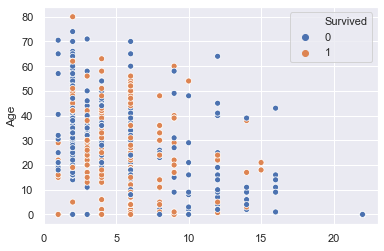

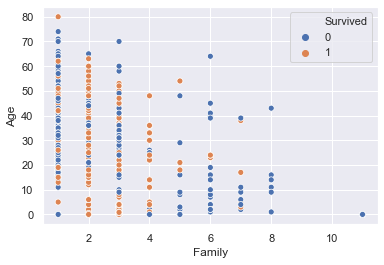

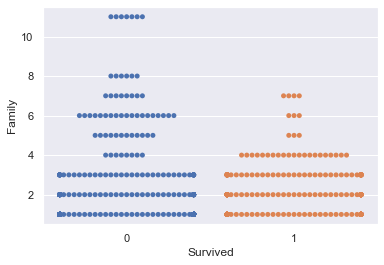

In [66]:
def plotter(data):

    X_train,X_test,y_train,y_test,X,Y,X_Test = Read_the_processed_data()
    sns.set()
    print(X.columns)
#     dataset.loc[:, dataset.columns != 'PassengerId']
    tester_X = X
    tester_X['Survived'] = Y
    
    M_age = tester_X.Age[tester_X['Sex'] == 1]
    M_surv = tester_X.Survived[tester_X['Sex'] == 1]
    
    F_age = tester_X.Age[tester_X['Sex'] == 2]
    F_surv = tester_X.Survived[tester_X['Sex'] == 2]
    
#     sns.kdeplot(M_age, label="Male Age", shade=True)
# #     plt.show()
#     sns.kdeplot(F_age, label="Female Age", shade=True)
#     plt.show()
    
#     sns.scatterplot(x=tester_X['Pclass'], y=tester_X['Fare'], hue=Y)
#     plt.show()
#     sns.scatterplot(x=tester_X['Sex'], y=tester_X['Name'], hue=Y)
#     plt.show()
#     sns.scatterplot(x=tester_X['Pclass'], y=tester_X['Name'], hue=Y)
#     plt.show()
#     sns.scatterplot(x=tester_X['Name'], y=tester_X['Fare'], hue=Y)
#     plt.show()
    sns.scatterplot(x=tester_X['Family']*tester_X['Embarked'], y=tester_X['Age'], hue=Y)
    plt.show()
    sns.scatterplot(x=tester_X['Family'], y=tester_X['Age'], hue=Y)
    plt.show()
    sns.swarmplot(y=tester_X['Family'],x=Y)
    plt.show()
    
    
    
#     for a in X.columns:
#         for b in X.columns:
#             sns.scatterplot(x=X[a], y=X[b], hue=Y)
#             plt.show()
#             sns.swarmplot(x=X[a],y=Y)
#             plt.show()
            # sns.distplot(a=X, kde=False)
            # plt.show()
            # sns.barplot(x=X[a], y=X[b])
            # plt.show()
            # sns.heatmap(data=X, annot=True)
            
            # plt.show()
plotter(12)

# 7.Run this Only Once

In [42]:
# DataPreProcessing()

# 8.Read The Processed Data ( by calling the function)

In [43]:
X_train,X_test,y_train,y_test,X,Y,X_Test = Read_the_processed_data()
To_pred = X_Test["PassengerId"]
X_Test = X_Test.loc[:,X_Test.columns != 'PassengerId']

reading done


# 9.Test and compare all the algorithms

In [44]:
def TestingAlgorithms():
	global X,Y
	# hig_score = 0.800
	# for n_ in [100,150,200,300,250]:
	# 	for m_dep in [10,20,30,40,50,70,100]:
	# 		for rann in [1,10,13,15,50,100]:
	# 			for m_lea in [1,2,3,4,5]:
	# 				for max_fea in [1,2,3,4]:
	# 					ForestGump = RandomForestClassifier(n_estimators = n_,max_depth = m_dep, 
	# 														random_state = rann,max_features = max_fea,
	# 														max_leaf_nodes = m_lea
	# 														)
	# 					score  = cross_val_score(ForestGump, X, Y, cv=3).mean()
	# 					print("Random Forest : ", score)
	# 					if(score>hig_score):
	# 						hig_score = score
	# 						print(hig_score)
	# 						print(n_," ",m_dep, " ",rann, " ",m_lea," ",max_fea)
	# print("sum total finally is ")
	# print(hig_score)
	# print(n_," ",m_dep, " ",rann, " ",m_lea," ",max_fea)
	# print("done")
	# exit()






	# ForestGump = ExtraTreesClassifier(n_estimators=150, random_state=0,
	# 									max_depth = 50,
	# 									max_features = 1
	# 									)


	''' criterion = "entropy" '''

	ForestGump = RandomForestClassifier(
										n_estimators = 300,
										max_depth = 15, 
										random_state = 15,
										max_features = 4,
										max_leaf_nodes = 60
										)


	ForestGump = RandomForestClassifier(n_estimators=26, max_depth=6, random_state=10)

	# calibrated_forest = CalibratedClassifierCV(
	# base_estimator=RandomForestClassifier(
	# 									n_estimators = 300, 
	# 									random_state = 15,
	# 									max_features = 4,
	# 									max_leaf_nodes = 60
	# 									))
# 	param_grid = {
#    'base_estimator__max_depth': [2, 4, 6, 8,15]}
# 	from sklearn.metrics import fbeta_score, make_scorer


# 	scoring = {'Recall': make_scorer(recall_score), 'F1': make_scorer(f1_score)}
 

# 	search = GridSearchCV(calibrated_forest,param_grid,scoring = scoring, cv=5)
# 	# print(type(search))
# 	search.fit(X_train,y_train)
# 	exit()
	# score = search().fit(X_train,y_train).predict(X_test)
	


	# ForestGump = RandomForestClassifier(max_depth=10, random_state=2)

	# ada = AdaBoostClassifier(n_estimators=100, random_state=0)
	# score = ForestGump.fit(X_train,y_train).predict(X_test)
	ForestGump.fit(X_train,y_train)
	score = (ForestGump.predict_proba(X_test)[:,1] >= 0.4).astype(int)
	score = ForestGump.predict(X_test)
	# adaScore = ada.fit(X_train,y_train).predict(X_test)

	# gnb = GaussianNB()
	# y_pred = gnb.fit(X_train, y_train).predict(X_test)

	# clf = MultinomialNB().fit(X_train, y_train).predict(X_test)

	# neural = MLPClassifier(solver='lbfgs', alpha=1e-5,
    #                 hidden_layer_sizes=(5), random_state=1).fit(X_train, y_train).predict(X_test)

	
	# xyz = pd.DataFrame({'RandomForest' : score,'Adaboost' : adaScore,'Gaussian' : y_pred,'MultiNomial' : clf,'MLPClassifier':neural})
	# # print(xyz)



	# neigh = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train).predict(X_test)


	# sdgc = linear_model.SGDClassifier(max_iter=1000, tol=1e-3).fit(X_train, y_train).predict(X_test)
	



	# answer = Compare(score,adaScore,y_pred,clf,neural,neigh,sdgc)


	# ChosenOne = choose(neural,score)

	# print(ChosenOne.shape)
	# print(answer.shape)



	# exit()







	# exit()
	# bagging = BaggingClassifier(GaussianNB(),
    #                         max_samples=0.5, max_features=0.5)
	

	# xgb = BaggingClassifier(model(),n_estimators = 10000,learning_rate=0.05)
	# evc = VotingClassifier( estimators= [('clf',clf),('ladyADA',ladyADA),('ForestGump',ForestGump),("ber",ber),
	# ("bagging",bagging),("clc",clc),("mul",mul),("sss",sss),("model",model)], voting = 'hard')

	# evc.fit(x_train.iloc[1:4000],y_train.iloc[1:4000])
	
	
	cv = 3


	print("starting the modeling")
	# print("Logistic regression : ",cross_val_score(clc, X, Y, cv=cv).mean())
	# print("Gaussin NB : ",cross_val_score(clf, X, Y, cv=cv).mean())
	# print("BernoulliNB : ",cross_val_score(ber, X, Y, cv=cv).mean())
	# print("MultinomialNB : ",cross_val_score(mul, X, Y, cv=cv).mean())
	# print("SVM : ",cross_val_score(sss, X, Y, cv=cv).mean())

	# print("Neural Net : ",cross_val_score(nerves, X, Y, cv=cv).mean())
	
	# score = cross_val_score(ForestGump, X_train,y_train, cv=cv)
	
	# print(ForestGump.score(y_test,score))
	# print(f1_score(y_test, score, average='weighted'))

	print("\n\nRandomForest: \n",confusion_matrix(y_test, score))  
	print('Accuracy: {:.2f}'.format(accuracy_score(y_test, score)))
	print('Precision: {:.2f}'.format(precision_score(y_test, score)))
	print('Recall: {:.2f}'.format(recall_score(y_test, score)))
	print('F1: {:.2f}'.format(f1_score(y_test, score)))

	print('Random class-proportional\n', 
      classification_report(y_test, score, target_names = ['not 1', '1']))


	# decision_funk = ForestGump.fit(X_train,y_train).predict_log_proba(X_test)
	

	# for a in list(zip(y_test[0:20],decision_funk[:20,1])):
	# 	print(a)

	# print(" ada boost : \n",confusion_matrix(y_test, adaScore))
	# print(" Gausssian : \n",confusion_matrix(y_test, y_pred))
	# print("multinomial NB : \n", confusion_matrix(y_test, clf))
	# print("Neural : \n", confusion_matrix(y_test, neural))
	# print("KNN : \n", confusion_matrix(y_test, neigh))
	# print("Stohistic gradinent : \n", confusion_matrix(y_test, sdgc))
	# print("Compared one : \n", confusion_matrix(y_test, answer))
	# print("Chosen one : \n", confusion_matrix(y_test, ChosenOne))

	# print("Random Forest : ",cross_val_score(ForestGump, X, Y, cv=cv).mean())

	# print("AdaBoost : ",cross_val_score(ladyADA, X, Y, cv=cv).mean())
	# print("Bagging : ",cross_val_score(bagging, X, Y, cv=cv).mean())
	# print("xgboost  : ",cross_val_score(model, X, Y, cv=cv).mean())
	# print("ensamble   : ",cross_val_score(evc, X, Y, cv=cv).mean())
	# print("xgb   : ",cross_val_score(xgb, X, Y, cv=cv).mean())
	


# 10.Train the algorithm which suits the best to our needs

In [45]:
def TrainMeFinally():

	# X_train,X_test,y_train,y_test,X,Y,X_Test = Read_the_processed_data()


	# clc = LogisticRegression()
	# clf = GaussianNB()
	# ber = BernoulliNB()
	# mul = MultinomialNB()
	# sss = svm.SVC()

	# from sklearn.ensemble import ExtraTreesClassifier
	# ExtraTreesClassifiergump = ExtraTreesClassifier(n_estimators=150, random_state=0,
	# 									max_depth = 50,
	# 									max_features = 1
	# 									)

	
	# model = XGBClassifier(n_estimators = 100,learning_rate =0.005,early_stopping_rounds =10)
	# ADA = model

	# ladyADA = AdaBoostClassifier(n_estimators=500, random_state=9)
	# ForestGump = RandomForestClassifier(n_estimators = 350,max_depth = 10, 
	# 									random_state = 15,max_features = 6,
	# 									n_jobs = -1)
		# ForestGump = RandomForestClassifier(
		# 									n_estimators = 300,
		# 									max_depth = 15, 
		# 									random_state = 1,
		# 									max_features = 4,
		# 									max_leaf_nodes = 60
		# 									)
	# from sklearn.ensemble import BaggingClassifier
	# bagging = BaggingClassifier(GaussianNB(),
    #                         max_samples=0.5, max_features=0.5)

	# ADA = VotingClassifier( estimators= [('clf',clf),('ladyADA',ladyADA),('ForestGump',ForestGump),("ber",ber),
	# ("bagging",bagging),("clc",clc),("mul",mul),("sss",sss),("model",model)], voting = 'hard')


	
	# ADA = RandomForestClassifier(max_depth=10, random_state=2)
	# ADA = XGBClassifier()
		# ForestGump.fit(X,Y)

	# ........................................

	global X,Y
	print(X_Test.shape)
	# exit()
	ForestGump = RandomForestClassifier(
										n_estimators = 300,
										max_depth = 15, 
										random_state = 15,
										max_features = 4,
										max_leaf_nodes = 60
										)
	ForestGump = RandomForestClassifier(n_estimators=26, max_depth=6, random_state=10)
	# ForestGump = RandomForestClassifier(max_depth=10, random_state=2)

	ada = AdaBoostClassifier(n_estimators=100, random_state=0)
	# score = 
	ForestGump.fit(X,Y)
	# .predict(X_Test)
	score = (ForestGump.predict_proba(X_Test)[:,1] >= 0.4).asstype(int)
	# adaScore = ada.fit(X,Y).predict(X_Test)

	# gnb = GaussianNB()
	# y_pred = gnb.fit(X,Y).predict(X_Test)

	# clf = MultinomialNB().fit(X,Y).predict(X_Test)

	# neural = MLPClassifier(solver='lbfgs', alpha=1e-5,
    #                 hidden_layer_sizes=(10,10,10), random_state=1).fit(X,Y).predict(X_Test)

	# neigh = KNeighborsClassifier(n_neighbors=3).fit(X,Y).predict(X_Test)


	# sdgc = linear_model.SGDClassifier(max_iter=1000, tol=1e-3).fit(X,Y).predict(X_Test)
	



	# answer = Compare(score,adaScore,y_pred,clf,neural,neigh,sdgc)

	return score

# 11.Call the plotter and Test algorithms functions here

reading done
Index(['Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


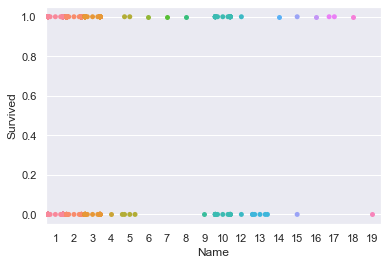

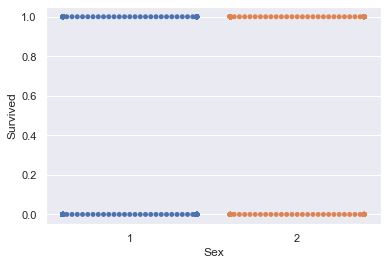

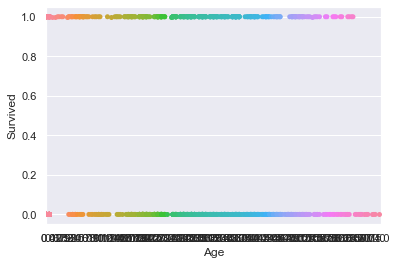

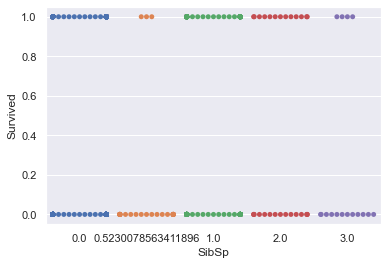

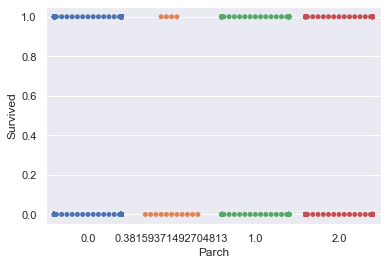

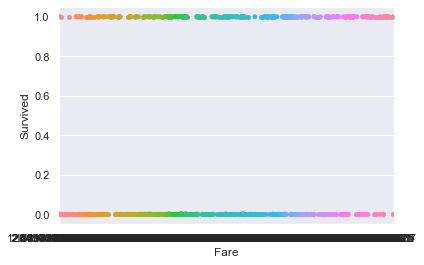

In [47]:
# X_train,X_test,y_train,y_test,X,Y,X_Test = DataPreProcessing()
plotter(1)
# TestingAlgorithms()

# 12.Write the File to upload to Kaggle

In [ ]:
PId = To_pred
print("here you go --------------------------- ")
print(To_pred.shape)
pred = TrainMeFinally()
print(pred.shape)
# exit()
# Start writing it to a csv file
with open('innovators.csv', 'w', newline='') as file:
	writer = csv.writer(file)
	# print(map(lambda x:[x], pred))
	zipped_lists=zip(PId,pred)
	writer.writerow(('PassengerId','Survived'))
	for row in zipped_lists:
		writer.writerow(row)


print("done")